## **Identificación De Especies de Mosquitos - Data Science**

Carol Arévalo, Stefano Aragoni, Luis Santos, Diego Perdomo

### *Análisis Exploratorio*

El Ministerio de Salud y Asistencia Social (MSPAS) ha informado que Guatemala ha experimentado un aumento significativo en el número de casos de dengue en 2023, con más de 10,000 casos confirmados y 21 muertes hasta el 12 de agosto. El MSPAS ha declarado una alerta epidemiológica en todo el país para combatir la propagación del dengue (Gobierno De Guatemala, 2023).  


Con esto en mente, el presente proyecto busca utilizar técnicas de procesamiento de imágenes y aprendizaje automático para identificar la especie de mosquito Aedes aegypti a partir de imágenes, con el fin de apoyar los esfuerzos de prevención del dengue en Guatemala.


----------

#### Librerías

Como primer paso, se importan las librerías necesarias para el desarrollo del proyecto.

In [5]:
# Liberias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from PIL import Image
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import cv2
from PIL import Image, ImageEnhance
from prettytable import PrettyTable

----------

#### Cargar Datos

Posteriormente, se cargaron los datos de las imágenes de los mosquitos e información adicional sobre las mismas.

- En este caso, `phase2_train_v0.csv` contiene información de las imagenes; incluyendo su tamaño, el tamaño del bounding box y la especie del mosquito.

- Por otro lado, en la carpeta `final` se encuentran las imágenes de los mosquitos.

In [2]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('phase2_train_v0.csv')

In [61]:
# Cargar todas las imagenes de la carpeta final
pictures = []

for i in os.listdir('final'):
    img = Image.open('final/'+i)
    pictures.append(img)
    img.close()      

----------

#### Datos (Variables, Observaciones)

Como se puede observar a continuación, el dataset de `phase2_train_v0.csv` contiene 8 variables. Asimismo, se tienen 10,357 datos de distintas imágenes de mosquitos.

Las variables de este dataset son las siguientes:
1. <font color='orange'> **img_fName** </font>
    - Esta columna contiene el nombre de archivo de una imagen
    - Categórica
2. <font color='orange'> **img_w** </font>
    - Representa el ancho de la imagen en píxeles
    - Cuantitativa Discreta
3. <font color='orange'> **img_h** </font>
    - Representa la altura de la imagen en píxeles
    - Cuantitativa Discreta
4. <font color='orange'> **bbx_xtl** </font>
    - Esto es la coordenada x del punto superior izquierdo del cuadro delimitador (bounding box) alrededor de un objeto en la imagen
    - Cuantitativa Discreta
5. <font color='orange'> **bbx_ytl** </font>
    - Esto es la coordenada y del punto superior izquierdo del cuadro delimitador alrededor de un objeto en la imagen
    - Cuantitativa Discreta
6. <font color='orange'> **bbx_xbr** </font>
    - Esto es la coordenada x del punto inferior derecho del cuadro delimitador alrededor de un objeto en la imagen
    - Cuantitativa Discreta
7. <font color='orange'> **bbx_ybr** </font>
    - Esto es la coordenada y del punto inferior derecho del cuadro delimitador alrededor de un objeto en la imagen
    - Cuantitativa Discreta
8. <font color='orange'> **class_label** </font>
    - Esta columna contiene la etiqueta de categoría de mosquito en la imagen
    - Categórica

In [ ]:
# Mostrar los primeros registros del DataFrame
print(data.shape)

data.head(10)

(10357, 8)


,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label
0,train_00000.jpeg,2448,3264,1301,1546,1641,2096,albopictus
1,train_00001.jpeg,3024,4032,900,1897,1950,2990,albopictus
2,train_00002.jpeg,768,1024,220,58,659,808,albopictus
3,train_00003.jpeg,3456,4608,1169,2364,1586,2826,albopictus
4,train_00004.jpeg,1024,1365,129,231,697,1007,culex
5,train_00005.jpeg,1152,2560,198,798,954,1351,albopictus
6,train_00006.jpeg,3072,4080,1104,1030,2458,2911,anopheles
7,train_00007.jpeg,2128,4608,248,728,2049,1992,albopictus
8,train_00008.jpeg,4000,2250,1768,899,2414,1591,albopictus
9,train_00009.jpeg,768,1024,180,140,683,744,albopictus


Más específicamente, la variable <font color='orange'> **class_label** </font> contiene 6 categorías distintas, las cuales son las siguientes:
- **Aedes albopictus (albopictus)** 

- **Culex (culex)**

- **Anopheles (anopheles)**

- **Culiseta (culiseta)**

- **Aedes japonicus/koreicus (japonicus/koreicus)**

- **Aedes aegypti (aegypti):** Este mosquito puede transmitir la enfermedad del dengue, la fiebre amarilla y el virus del Zika. Presente en Guatemala.


A continuación, se muestra una imagen de cada especie de mosquito:

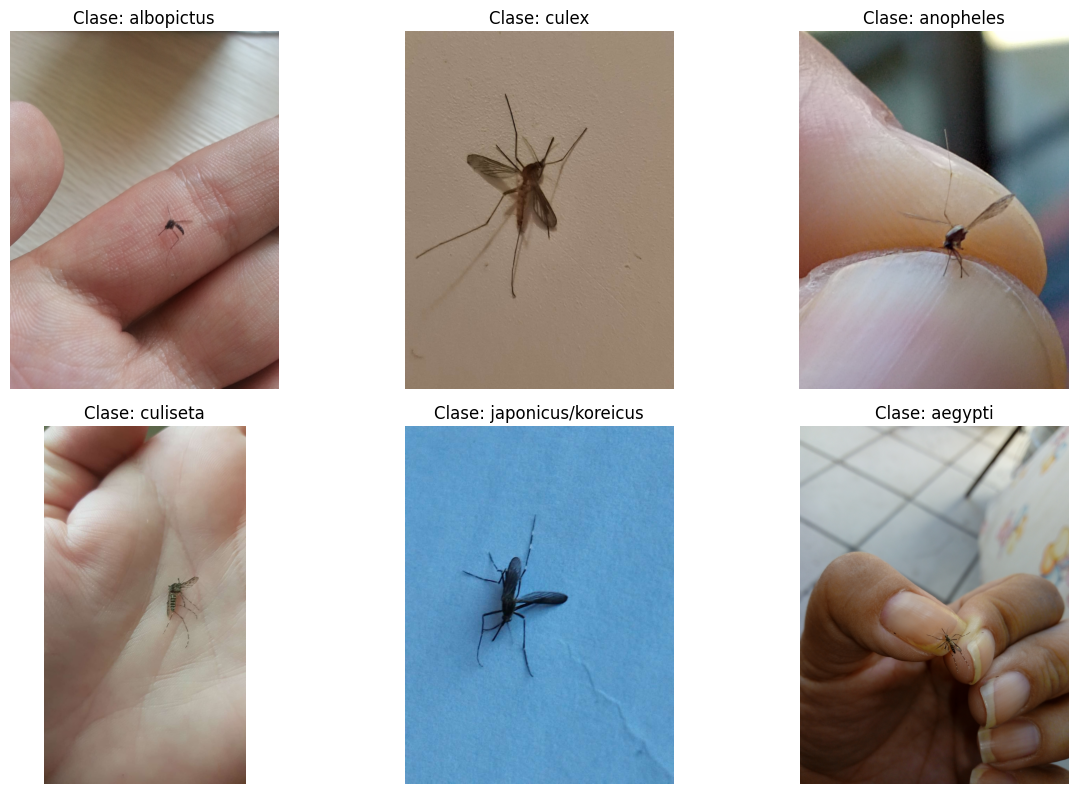

In [ ]:
# Obtener las clases únicas en el conjunto de datos
unique_classes = data['class_label'].unique()

# Definir las dimensiones de la cuadrícula
num_rows = len(unique_classes) // 3 + 1  # 3 columnas en la cuadrícula
num_cols = 3

# Crear una figura y ejes para la cuadrícula
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Recorrer las clases y mostrar la primera imagen de cada una en la cuadrícula
for i, class_label in enumerate(unique_classes):
    # Filtrar las filas correspondientes a la clase actual
    class_data = data[data['class_label'] == class_label]
    
    # Obtener el nombre del primer archivo de imagen de la clase actual
    first_image_name = class_data.iloc[0]['img_fName']
    
    # Cargar la imagen utilizando PIL (Python Imaging Library)
    image_path = 'final/' + first_image_name  # Ajusta la ruta según tus datos
    img = Image.open(image_path)
    
    # Calcular la fila y la columna en la cuadrícula
    row = i // num_cols
    col = i % num_cols
    
    # Mostrar la imagen en la subtrama correspondiente
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'Clase: {class_label}')
    axes[row, col].axis('off')  # Para ocultar los ejes

# Ocultar cualquier subtrama vacía
for i in range(len(unique_classes), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Ajustar automáticamente el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la cuadrícula de imágenes
plt.show()


----------

#### Datos Faltantes / Nulos

Como se puede observar a continuación, el dataset de `phase2_train_v0.csv` no presenta datos faltantes en ninguna de sus variables. Por tal motivo, no se requiere realizar ningún tipo de cambio.

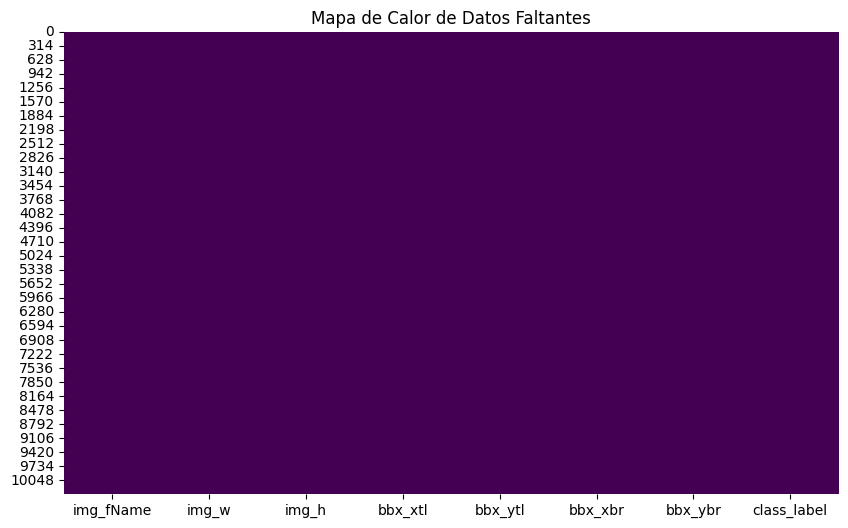

In [ ]:
# Crear un mapa de calor de datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

Asimismo, cabe destacar que el dataset tampoco presentó datos nulos, por lo que no fue necesario realizar ningun tipo de limpieza de datos inicial. 

In [ ]:
# Obtener información general sobre el DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_fName    10357 non-null  object
 1   img_w        10357 non-null  int64 
 2   img_h        10357 non-null  int64 
 3   bbx_xtl      10357 non-null  int64 
 4   bbx_ytl      10357 non-null  int64 
 5   bbx_xbr      10357 non-null  int64 
 6   bbx_ybr      10357 non-null  int64 
 7   class_label  10357 non-null  object
dtypes: int64(6), object(2)
memory usage: 647.4+ KB
None


----------

#### Limpieza de Datos (Inicial)

En este caso, no se presentaron datos faltantes, nulos, ni inconsistentes. Por tal motivo, no fue necesario realizar ningún tipo de limpieza de datos inicial.


Sin embargo, sí se utilizó Label Encoder para convertir la variable categórica <font color='orange'> **class_label** </font> en variables numéricas.

In [3]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar la transformación a la columna 'class_label'
data['class_label_encoded'] = label_encoder.fit_transform(data['class_label'])

data.head(10)

,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label,class_label_encoded
0,train_00000.jpeg,2448,3264,1301,1546,1641,2096,albopictus,1
1,train_00001.jpeg,3024,4032,900,1897,1950,2990,albopictus,1
2,train_00002.jpeg,768,1024,220,58,659,808,albopictus,1
3,train_00003.jpeg,3456,4608,1169,2364,1586,2826,albopictus,1
4,train_00004.jpeg,1024,1365,129,231,697,1007,culex,3
5,train_00005.jpeg,1152,2560,198,798,954,1351,albopictus,1
6,train_00006.jpeg,3072,4080,1104,1030,2458,2911,anopheles,2
7,train_00007.jpeg,2128,4608,248,728,2049,1992,albopictus,1
8,train_00008.jpeg,4000,2250,1768,899,2414,1591,albopictus,1
9,train_00009.jpeg,768,1024,180,140,683,744,albopictus,1


----------

#### Análisis Exploratorio

> **Estudio de las variables cuantitativas mediante técnicas de estadística descriptiva**

El análisis del dataset `phase2_train_v0.csv` muestra que las imágenes tienen distintos tamaños, lo que se puede evidenciar a través de los valores de desviación estándar (std) en las columnas correspondientes. Los valores de std indican la variabilidad de los tamaños de las imágenes en cada una de las dimensiones, así como en las coordenadas de las cajas delimitadoras (bounding boxes) de los objetos en las imágenes.

- Esto es importante, ya que indica que **se deben realizar cambios en las imágenes para estandarizarlas** y mejorar la calidad de las mismas. Esto es importante ya que los modelos CNN requieren que las imágenes tengan el mismo tamaño para poder procesarlas.

Asimismo, se puede observar que los valores de la media (mean) en las columnas correspondientes son similares a los valores de mediana (50%) en las mismas columnas. Esto indica que los datos no están sesgados.

Finalmente, cabe destacar nuevamente la gran diferencia entre los valores mínimos y máximos en las columnas correspondientes. Esto indica que los datos están dispersos.

In [ ]:
# Resumen estadístico de las columnas numéricas
data.describe()

,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label_encoded
count,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000
mean,2039.716327,2470.491165,666.901323,887.978372,1330.077532,1565.666699,2.230569
std,1174.279458,1357.607784,512.356341,645.361851,793.412874,903.075535,1.209967
min,139.000000,106.000000,0.000000,0.000000,128.000000,85.000000,0.000000
25%,1024.000000,1109.000000,276.000000,394.000000,640.000000,761.000000,1.000000
50%,1844.000000,2208.000000,502.000000,677.000000,1154.000000,1337.000000,3.000000
75%,3024.000000,4000.000000,987.000000,1349.000000,1880.000000,2304.000000,3.000000
max,9280.000000,12000.000000,3977.000000,5459.000000,7327.000000,7601.000000,5.000000


> **Análisis | Variable Categórica**

Posteriormente, se buscó determinar la distribución de las clases en el dataset analizado. Como se puede observar a continuación, parece haber un desequilibrio en la distribución de clases. Más específicamente, las clases albopictus y culex siendo son las más representadas, mientras que las clases anopheles y aegypti tienen un número mucho menor de muestras. 

El desequilibrio de clases puede afectar el rendimiento del modelo en la detección y clasificación de las clases minoritarias. **Es necesario aplicar técnicas de muestreo (como Data Augmentation) para abordar este desequilibrio**.


Distribución de Etiquetas de Clase:
+--------------------+------------+------------+
|       Clase        | Frecuencia | Proporción |
+--------------------+------------+------------+
|     albopictus     |    4612    |   44.53%   |
|       culex        |    4563    |   44.06%   |
|      culiseta      |    622     |   6.01%    |
| japonicus/koreicus |    429     |   4.14%    |
|     anopheles      |     84     |   0.81%    |
|      aegypti       |     47     |   0.45%    |
+--------------------+------------+------------+


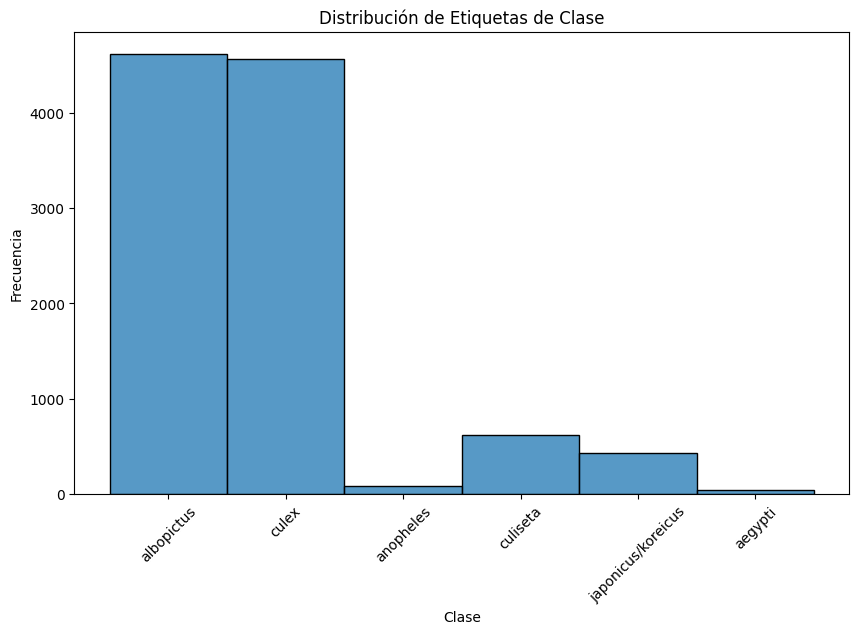

In [6]:
# Contar las etiquetas de clase únicas
class_counts = data['class_label'].value_counts()

# Crear una tabla para mostrar la frecuencia y la proporción
table = PrettyTable()
table.field_names = ["Clase", "Frecuencia", "Proporción"]

total_samples = len(data)
for label, count in class_counts.items():
    proportion = count / total_samples
    table.add_row([label, count, f"{proportion:.2%}"])

print("Distribución de Etiquetas de Clase:")
print(table)

# Crear un histograma de la distribución de las etiquetas de clase
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='class_label', bins=len(class_counts))
plt.title('Distribución de Etiquetas de Clase')
plt.xticks(rotation=45)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


> **Análisis | Variables Numéricas**

En el caso de las variables numéricas, primero se quiso analizar la distribución de los datos del ancho y alto de las imágenes. 


Como se puede observar en los diagramas de caja y bigotes, las dimensiones de las imágenes (de los diferentes tipos de mosquitos) tienen dimensiones en rangos similares. Sin embargo, para utilizar CNN es necesario que todas las imágenes tengan el mismo tamaño. Esto se debe a que las capas convolucionales y de agrupación (pooling) están diseñadas para operar con ventanas tamaño fijo. Como se tienen imágenes de diferentes dimensiones, se deberan redimensionarlas para que todas coincidan. 

- Por tal motivo, **se deben realizar cambios en las imágenes para estandarizarlas** y mejorar la calidad de las mismas.

Cabe destacar que los `datos atípicos pueden ser resultado de diferentes cámaras, ángulos de captura, resoluciones, etc`. Esto considerando  la gran cantidad de dispositivos tecnologicos que existen en la actualidad capaces de tomar fotografías. 

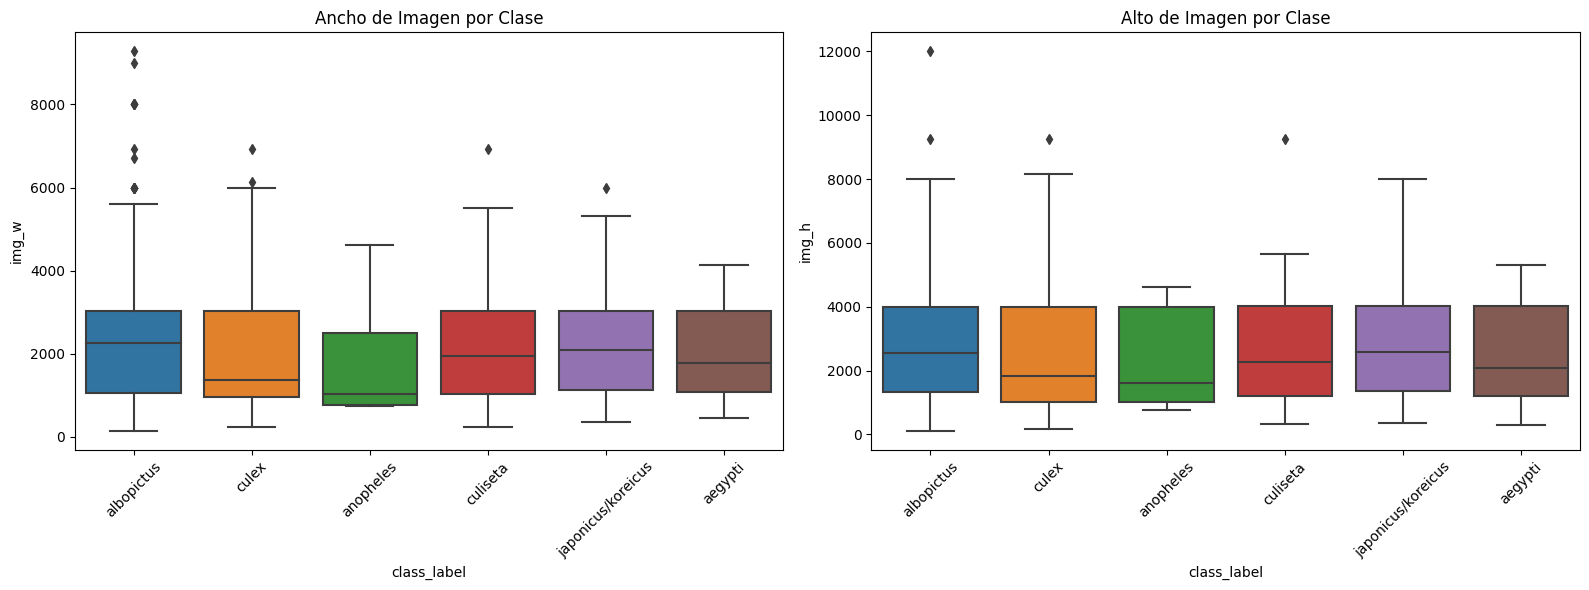

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='class_label', y='img_w', data=data)
plt.title('Ancho de Imagen por Clase')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='class_label', y='img_h', data=data)
plt.title('Alto de Imagen por Clase')
plt.xticks(rotation=45)

# Mostrar los gráficos uno al lado del otro
plt.tight_layout()
plt.show()


Asimismo, cabe destacar que también se comparó los promedios de ancho y alto de las imágenes de cada especie de mosquito. Nuevamente, se puede observar que estos valores son similares pero hay variaciones. Nuevamente estas se pueden atribuir a las diferentes cámaras, lentes, resoluciones de fotografías, etc.

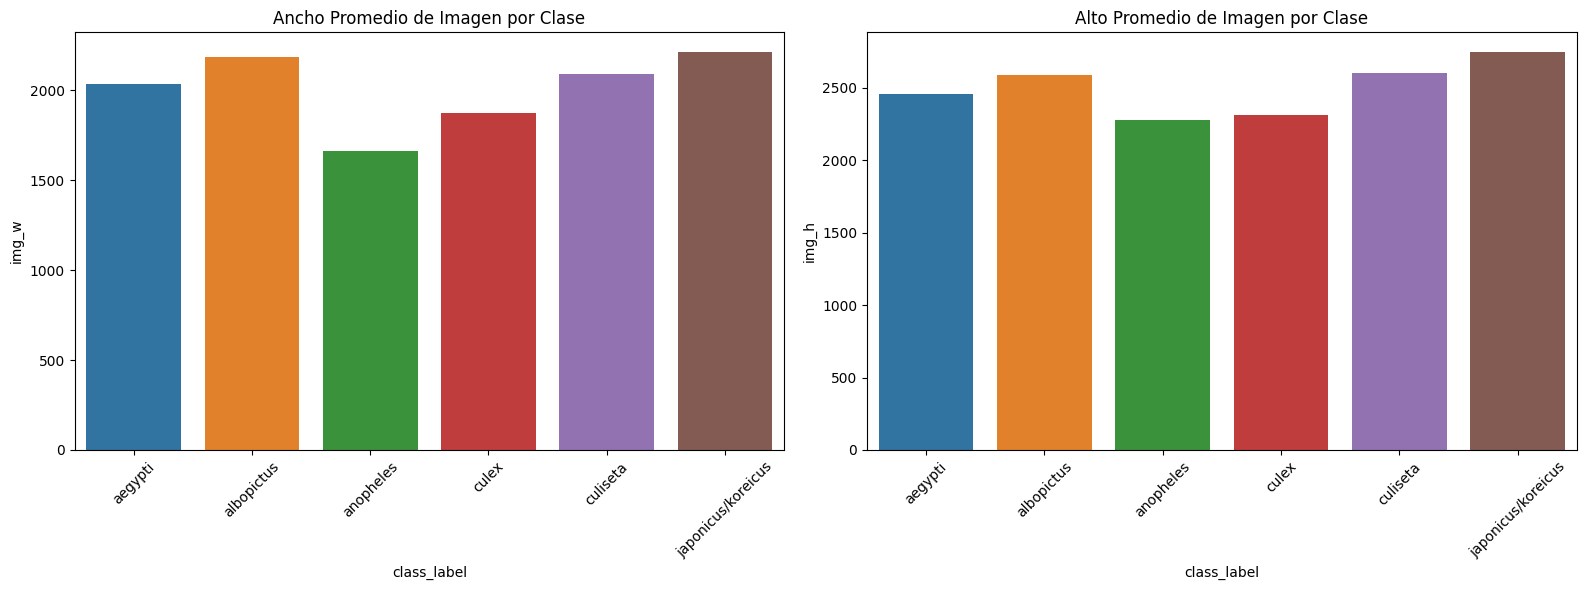

In [ ]:
# Calcular la media del ancho de las imágenes por clase
mean_width_by_class = data.groupby('class_label')['img_w'].mean().reset_index()

# Calcular la media del alto de las imágenes por clase
mean_height_by_class = data.groupby('class_label')['img_h'].mean().reset_index()

# Establecer el tamaño de la figura para mostrar las visualizaciones lado a lado
plt.figure(figsize=(16, 6))

# Visualizar la media del ancho de las imágenes por clase
plt.subplot(1, 2, 1)
sns.barplot(x='class_label', y='img_w', data=mean_width_by_class)
plt.title('Ancho Promedio de Imagen por Clase')
plt.xticks(rotation=45)

# Visualizar la media del alto de las imágenes por clase
plt.subplot(1, 2, 2)
sns.barplot(x='class_label', y='img_h', data=mean_height_by_class)
plt.title('Alto Promedio de Imagen por Clase')
plt.xticks(rotation=45)

# Mostrar las visualizaciones lado a lado
plt.tight_layout()
plt.show()


Posteriormente, se quiso analizar la distribución de datos de las coordenadas de las cajas delimitadoras (bounding boxes) de los objetos en las imágenes.

Como se puede observar en los diagramas de caja y bigotes, las coordenadas (X y Y) superior izquierda son las que más presentan datos atípicos. Esto puede deberse a que no todos los mosquitos se encuentran en la misma posición en las imágenes; por ejemplo, algunos mosquitos pueden estar en el centro de la imagen, mientras que otros pueden estar en las esquinas. Asimismo, es importante mencionar que estos valores dependen del tamaño de la imagen. Por tal razón, si una imagen es más grande, las coordenadas de las cajas delimitadoras también serán más grandes.

Por otro lado, cabe destacar que la coordenada X inferior derecha también presenta varios datos atípicos. Nuevamente, puede deberse a la forma en la que se posicionó el zancudo en la fotografía.


Cabe destacar que anopheles y aegypti son los que menos puntos atípicos tienen. Esto claramente debido a que son las categorías de zancudos con la menor cantidad de datos. 

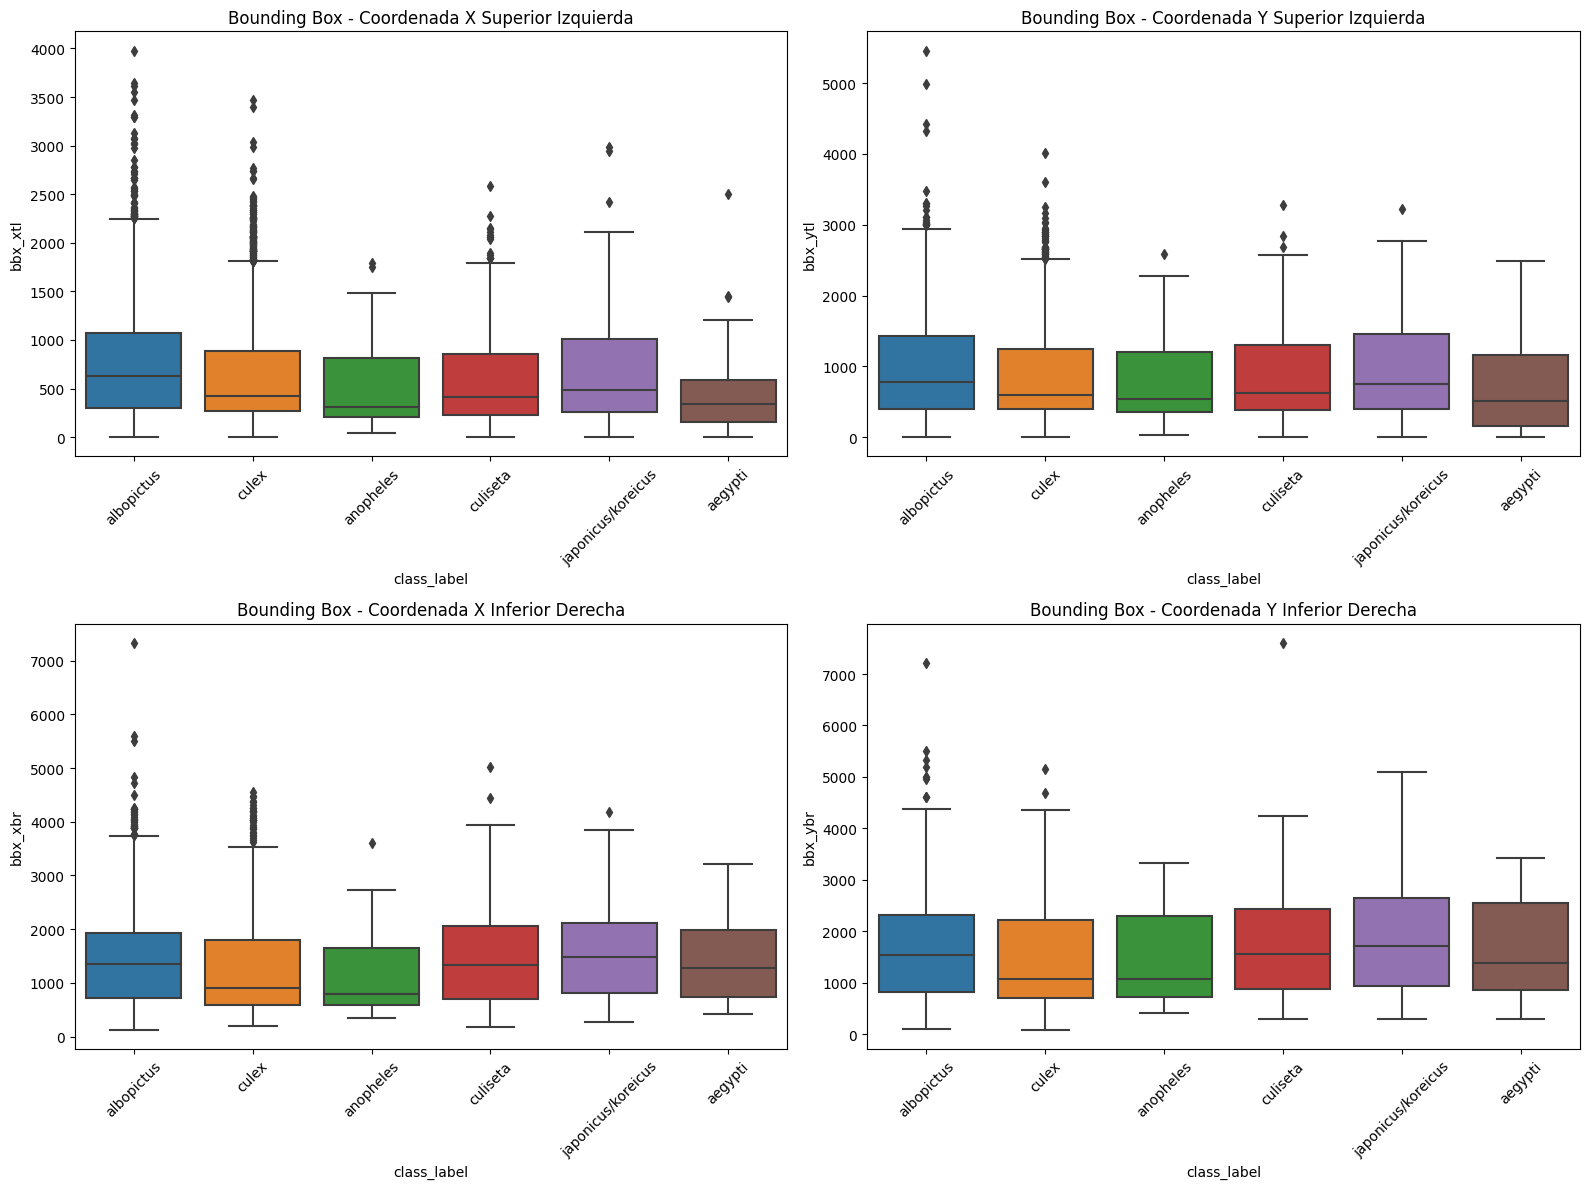

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(16, 12))

# Subtrama 1: bbx_xtl
plt.subplot(2, 2, 1)
sns.boxplot(x='class_label', y='bbx_xtl', data=data)
plt.title('Bounding Box - Coordenada X Superior Izquierda')
plt.xticks(rotation=45)

# Subtrama 2: bbx_ytl
plt.subplot(2, 2, 2)
sns.boxplot(x='class_label', y='bbx_ytl', data=data)
plt.title('Bounding Box - Coordenada Y Superior Izquierda')
plt.xticks(rotation=45)

# Subtrama 3: bbx_xbr
plt.subplot(2, 2, 3)
sns.boxplot(x='class_label', y='bbx_xbr', data=data)
plt.title('Bounding Box - Coordenada X Inferior Derecha')
plt.xticks(rotation=45)

# Subtrama 4: bbx_ybr
plt.subplot(2, 2, 4)
sns.boxplot(x='class_label', y='bbx_ybr', data=data)
plt.title('Bounding Box - Coordenada Y Inferior Derecha')
plt.xticks(rotation=45)

# Mostrar los gráficos en un grid 2x2
plt.tight_layout()
plt.show()


> **Análisis | Pixeles de Imágenes**

Finalmente, se optó por analizar los colores de las diferentes imágenes. Como se puede observar a continuación, se encontró el color promedio de cada imagen. En base a esto, se almacenó los valores RGB del color promedio de cada imagen en una lista.

Posteriormente, se graficaron los valores RGB de cada imagen a través de un diagrama de caja y bigotes. En este caso se puede observar que los canales de colores están distribuidos de manera similar. En realidad, todos parecen tener una distribución normal, y una dispersión similar. Sin embargo, es importante mencionar que el canal rojo (R) suele tener valores más altos que los otros dos canales.

Cabe destacar que hay varios valores atípicos en los diferentes canales. Esto puede deberse a que hay imágenes tomadas en condiciones de iluminación diferentes, lo que afecta los colores de las imágenes. Por ejemplo, posiblemente hay imágenes tomadas en la noche, mientras que otras fueron tomadas en el día.

In [ ]:
r = []
g = []
b = []

for i, image_name in enumerate(os.listdir('final')):
    image_path = os.path.join('final', image_name)
    img = cv2.imread(image_path)
    if img is not None:
        r.append(img[:, :, 2].mean())
        g.append(img[:, :, 1].mean())
        b.append(img[:, :, 0].mean())

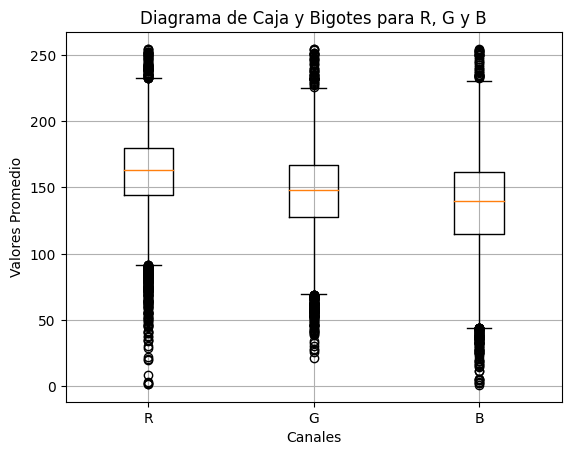

In [ ]:
# Crear un gráfico de caja y bigotes para R, G y B en una misma gráfica
plt.boxplot([r, g, b], labels=['R', 'G', 'B'])
plt.title('Diagrama de Caja y Bigotes para R, G y B')
plt.xlabel('Canales')
plt.ylabel('Valores Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


> **Análisis de correlaciones entre las variable**

Posteriormente, se quiso analizar las correlaciones entre las variables. Más específicamente, se buscó determinar si existe una correlación entre el tamaño de la imagen y el tamaño de la caja delimitadora (bounding box) de los objetos en las imágenes.

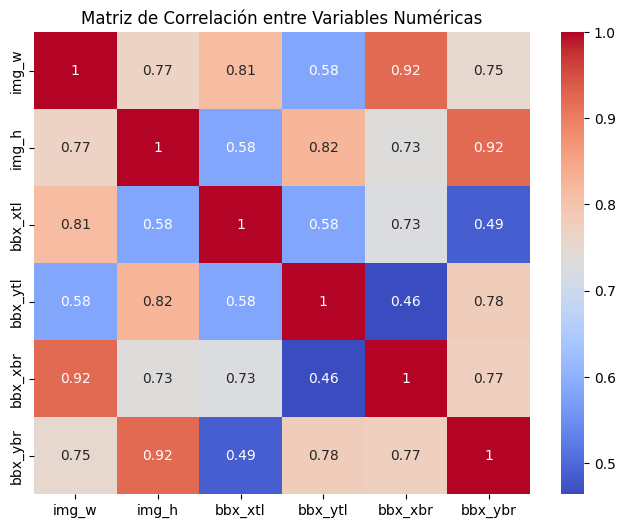

In [ ]:
# Visualizar la correlación entre las variables numéricas
# Filtrar solo las columnas numéricas
numeric_columns = ['img_w', 'img_h', 'bbx_xtl', 'bbx_ytl', 'bbx_xbr', 'bbx_ybr']
numeric_data = data[numeric_columns]

# Calcular la matriz de correlación entre variables numéricas
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


En este caso, se le dio prioridad a las variables con correlaciones más altas (>0.7). Como se puede observar a continuación, las variables con mayor correlación son las siguientes:

1. img_w (ancho de la imagen) tiene una correlación muy alta de 0.92 con bbx_xbr (coordenada x del punto inferior derecho del cuadro delimitador).


2. img_h (altura de la imagen) también tiene una correlación muy alta de 0.92 con bbx_ybr (coordenada y del punto inferior derecho del cuadro delimitador).

3. img_h muestra una correlación significativa de 0.82 con bbx_ytl (coordenada y del punto superior izquierdo del cuadro delimitador).

3. img_w presenta una correlación notable de 0.81 con bbx_xtl (coordenada x del punto superior izquierdo del cuadro delimitador).

4. bbx_ytl y bbx_ybr tienen una correlación de 0.78, lo que indica cierta relación en las coordenadas y del punto superior izquierdo e inferior derecho del cuadro delimitador.

5. bbx_xbr y bbx_ybr tienen una correlación de 0.77, lo que sugiere una relación entre las coordenadas x e y del punto inferior derecho del cuadro delimitador.

6. img_w y img_h tienen una correlación de 0.77, lo que podría indicar que las imágenes tienden a mantener una cierta relación de aspecto.

7. img_w muestra una correlación de 0.75 con bbx_ybr, lo que también sugiere cierta relación entre el ancho de la imagen y la coordenada y del punto inferior derecho del cuadro delimitador.

8. img_h tiene una correlación de 0.73 con bbx_xbr, lo que indica una relación entre la altura de la imagen y la coordenada x del punto inferior derecho del cuadro delimitador.

9. bbx_xtl y bbx_xbr tienen una correlación de 0.73, lo que sugiere una relación en las coordenadas x del punto superior izquierdo e inferior derecho del cuadro delimitador.

En resumen, se puede observar correlaciones significativas ya que las coordenadas de los cuadros delimitadores (bounding boxes) en las imágenes estan relacionadas con las dimensiones de las propias imágenes. 

In [ ]:
# Encontrar las variables con mayor correlación
corr_threshold = 0.7  # Puedes ajustar este umbral según tus necesidades
highly_correlated_pairs = []

for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > corr_threshold:
            pair = (numeric_columns[i], numeric_columns[j], correlation)
            highly_correlated_pairs.append(pair)

# Ordenar los pares de mayor a menor correlación absoluta
highly_correlated_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Imprimir los pares de variables altamente correlacionadas
for pair in highly_correlated_pairs:
    var1, var2, corr = pair
    print(f"{var1} - {var2}: Correlación = {corr:.2f}")


img_w - bbx_xbr: Correlación = 0.92
img_h - bbx_ybr: Correlación = 0.92
img_h - bbx_ytl: Correlación = 0.82
img_w - bbx_xtl: Correlación = 0.81
bbx_ytl - bbx_ybr: Correlación = 0.78
bbx_xbr - bbx_ybr: Correlación = 0.77
img_w - img_h: Correlación = 0.77
img_w - bbx_ybr: Correlación = 0.75
img_h - bbx_xbr: Correlación = 0.73
bbx_xtl - bbx_xbr: Correlación = 0.73


----------

#### Estandarización de Imágenes

Según el análisis exploratorio, se encontró que las fotografías no tienen las mismas dimensiones. 

Por lo tanto, como primer punto, se recortaron las imágenes en base a las coordenadas del Bounding Box. Esto permitió eliminar el fondo de las imágenes y enfocarse en el mosquito. 

Posteriormente, se buscó estandarizar las imágenes para que todas tengan el mismo tamaño. Esto es importante ya que los modelos CNN requieren que las imágenes tengan el mismo tamaño para poder procesarlas. Por tal razón, se redimensionaron las imágenes a un tamaño de 100x100 píxeles.

Posteriormente, se normalizaron los valores de los pixeles de las imágenes. Esto es importante ya que los modelos CNN requieren que los valores de los pixeles de las imágenes estén en un rango de 0 a 1.

In [ ]:
input_folder = 'final'
output_folder = 'resized_normalized'

# Crear la carpeta de salida si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Definir el tamaño objetivo
target_width = 100
target_height = 100

for row in data.itertuples():
    filename = row.img_fName

    # Cargar la imagen utilizando Pillow (PIL)
    img_path = os.path.join(input_folder, filename)
    img = Image.open(img_path)

    bbx_xtl = row.bbx_xtl
    bbx_ytl = row.bbx_ytl
    bbx_xbr = row.bbx_xbr
    bbx_ybr = row.bbx_ybr

    # Recortar la imagen utilizando las coordenadas de la bounding box
    img = img.crop((bbx_xtl, bbx_ytl, bbx_xbr, bbx_ybr))

    # Redimensiona la imagen al tamaño objetivo
    img = img.resize((target_width, target_height), Image.ANTIALIAS)
    
    # Normaliza los píxeles al rango [0, 1]
    img = np.array(img) / 255.0

    # Guarda la imagen redimensionada y normalizada en la carpeta de salida
    output_path = os.path.join(output_folder, filename)
    img = Image.fromarray((img * 255).astype(np.uint8))  # Convierte de nuevo a formato de imagen
    img.save(output_path)

Como se puede observar a continuación, se graficaron las imágenes estandarizadas. En este caso, se puede observar que todas las imágenes tienen el mismo tamaño y que el fondo de las imágenes fue eliminado.

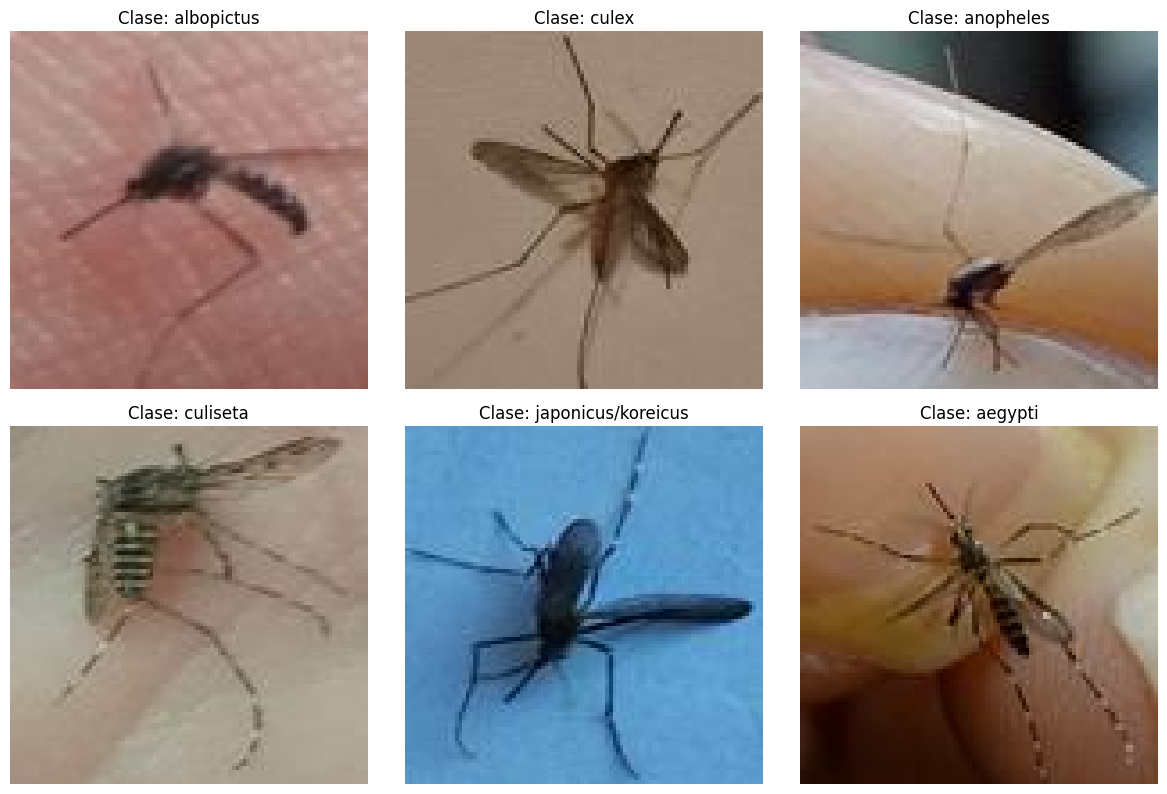

In [74]:
# Obtener las clases únicas en el conjunto de datos
unique_classes = data['class_label'].unique()

# Definir las dimensiones de la cuadrícula
num_rows = len(unique_classes) // 3 + 1  # 3 columnas en la cuadrícula
num_cols = 3

# Crear una figura y ejes para la cuadrícula
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Recorrer las clases y mostrar la primera imagen de cada una en la cuadrícula
for i, class_label in enumerate(unique_classes):
    # Filtrar las filas correspondientes a la clase actual
    class_data = data[data['class_label'] == class_label]
    
    # Obtener el nombre del primer archivo de imagen de la clase actual
    first_image_name = class_data.iloc[0]['img_fName']
    
    # Cargar la imagen utilizando PIL (Python Imaging Library)
    image_path = 'resized_normalized/' + first_image_name  # Ajusta la ruta según tus datos
    img = Image.open(image_path)
    
    # Calcular la fila y la columna en la cuadrícula
    row = i // num_cols
    col = i % num_cols
    
    # Mostrar la imagen en la subtrama correspondiente
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'Clase: {class_label}')
    axes[row, col].axis('off')  # Para ocultar los ejes

# Ocultar cualquier subtrama vacía
for i in range(len(unique_classes), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Ajustar automáticamente el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la cuadrícula de imágenes
plt.show()
